
Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89        33
           1       0.84      0.93      0.88        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61


Decision Tree Results:
              precision    recall  f1-score   support

           0       0.90      0.79      0.84        33
           1       0.78      0.89      0.83        28

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61


Random Forest Results:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        33
           1       0.87      0.93      0.90        28

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90       

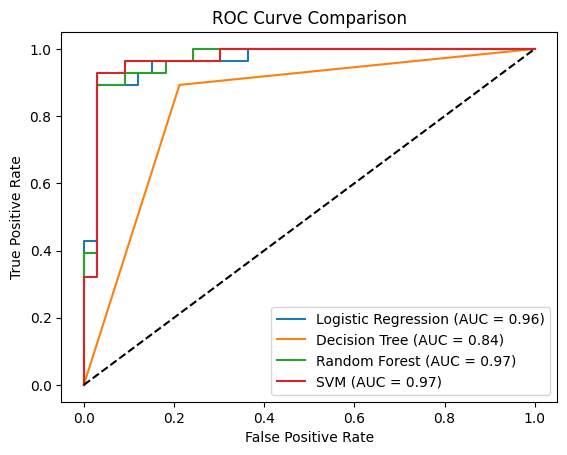

In [1]:
# 04_supervised_learning.ipynb
# Step 2.4 - Classification Models
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_curve, auc
import joblib

# 1. Load dataset with selected features
df = pd.read_csv("../data/selected_features.csv")

X = df.drop("num", axis=1)

# Convert target to binary: 0 = no disease, 1 = presence of disease
y = (df["num"] > 0).astype(int)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# 3. Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

results = {}

# 4. Train & evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{name} Results:")
    print(classification_report(y_test, y_pred))

    results[name] = classification_report(y_test, y_pred, output_dict=True)

    # Save model for later use
    joblib.dump(model, f"../models/{name.replace(' ', '_').lower()}_model.pkl")

    # ROC Curve
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Finalize ROC Curve plot
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.savefig("../results/roc_comparison.png", dpi=300, bbox_inches="tight")
plt.show()

# 5. Save evaluation metrics
with open("../results/evaluation_metrics.txt", "w") as f:
    for name, metrics in results.items():
        f.write(f"\n{name} Metrics:\n")
        f.write(str(metrics))
        f.write("\n")

